In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

Q1

In [2]:
# Carry out the I -> R recovery process for one time step. 
def recover(i_nodes, r_nodes, p):
    new_recovered = []
    for i in i_nodes:
        if random.random() < p:
            new_recovered.append(i)
    for i in new_recovered:
            r_nodes.append(i)
            i_nodes.remove(i)
    return new_recovered

Q2

In [3]:
#Carry out the S -> I spreading process for one time step.
def spread(G, s_nodes, i_nodes, p):
    new_infected = set()
    for i in i_nodes:
        if not G.neighbors(i):
            continue
        else: 
            neighbor = random.choice(list(G.neighbors(i)))
            if neighbor in s_nodes:
                if random.random() < p:
                    new_infected.add(neighbor)
    for i in new_infected:
        s_nodes.remove(i)
        i_nodes.append(i)
    return new_infected
    

Q3

In [4]:
# Simulate an epidemic.
def simulate(G, p_si, p_ir, num_seeds, num_time_steps):
    # Initialize the sets of S, I, and R nodes.
    i_nodes = random.sample(G.nodes(), num_seeds)
    s_nodes = list(set(G.nodes()) - set(i_nodes))
    r_nodes = []
    num_i = [len(i_nodes)]
    num_s = [len(s_nodes)]
    num_r = [len(r_nodes)]
    # Run the simulation for num_time_steps time steps.
    for t in range(num_time_steps):
        # Carry out the recovery process.
        new_recovered = recover(i_nodes, r_nodes, p_ir)
        # Carry out the spreading process.
        new_infected = spread(G, s_nodes, i_nodes, p_si)
        # Update the number of S, I, and R nodes.
        num_i.append(len(i_nodes))
        num_s.append(len(s_nodes))
        num_r.append(len(r_nodes))
    return num_i, num_s, num_r

Q4

In [5]:
# Plot the number of S, I, and R nodes as a function of time.
def make_plot(num_nodes, num_s_nodes, num_i_nodes, num_r_nodes, num_time_steps): 
    h1, = plt.plot(np.array(num_s_nodes) / num_nodes)
    h2, = plt.plot(np.array(num_i_nodes) / num_nodes)
    h3, = plt.plot(np.array(num_r_nodes) / num_nodes)
    plt.xlabel("Time")
    plt.ylabel("Fraction of S, I, and R nodes")
    plt.legend([h1,h2,h3], ["S nodes","I nodes","R nodes"], loc="center left") 
    plt.xlim([0, num_time_steps])

/var/folders/19/s4zdyd_16mb8h239mgwds83m0000gn/T/ipykernel_94903/2215877259.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  i_nodes = random.sample(G.nodes(), num_seeds)


<IPython.core.display.Javascript object>


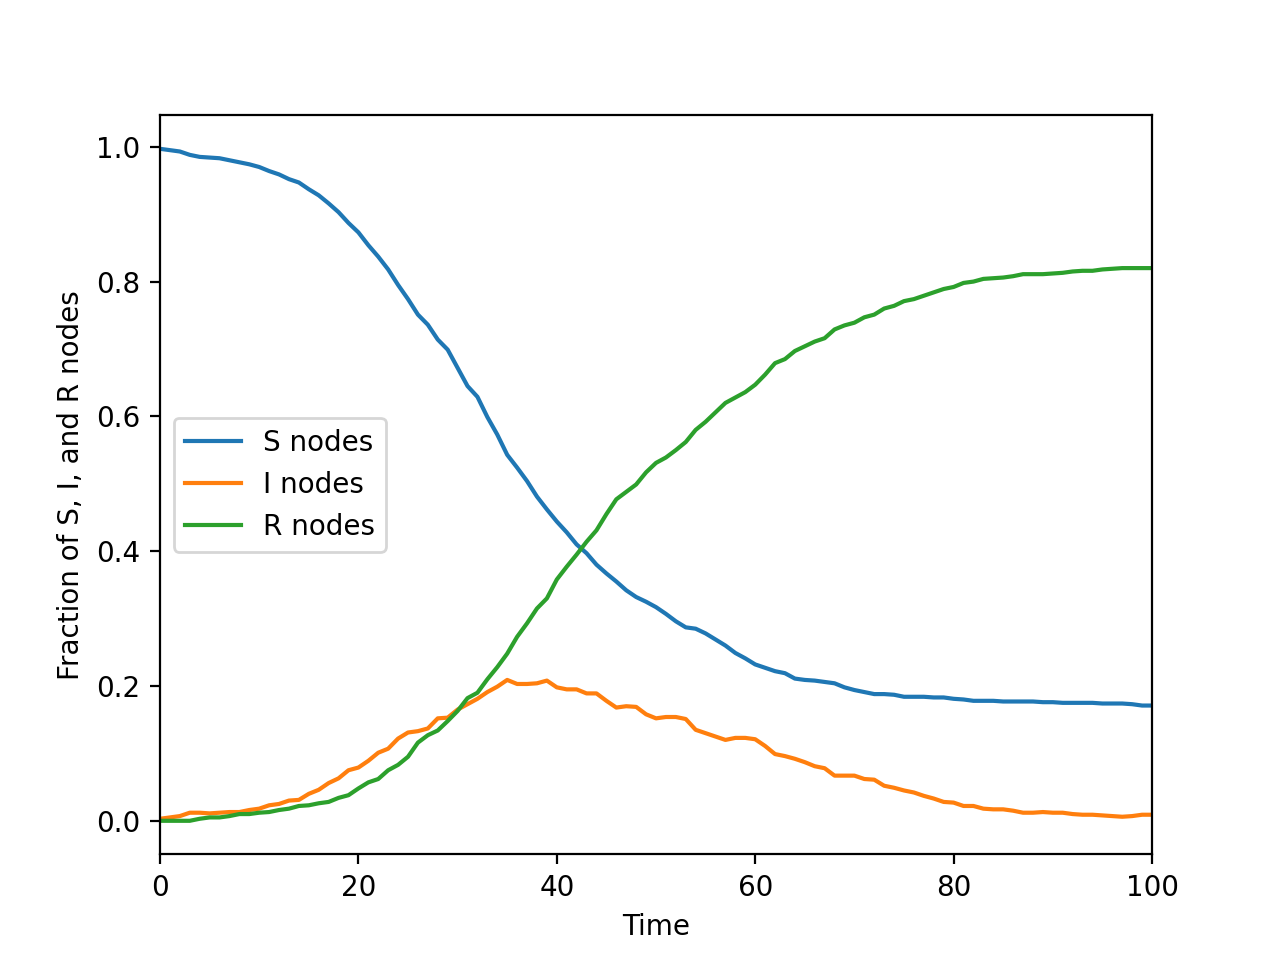

In [6]:
# run the simulation
G = nx.erdos_renyi_graph(1000, 0.01)
num_i, num_s, num_r = simulate(G, 0.3, 0.1, 3, 100)
make_plot(1000, num_s, num_i, num_r, 100)